<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_ppo_training_walkforward_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [2]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 2.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.


In [3]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,848 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu

In [4]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [5]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [6]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 133.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 205.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 73.0 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [7]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [8]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0


import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


In [9]:
# Install all required packages
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance --quiet
!pip install stable-baselines3[extra] --quiet


In [10]:
# ✅ Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime, timedelta

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv

# ✅ Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "ppo_walkforward_v1"

CONFIG = {
    'symbols': ticker_list,
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}

# ✅ Download Function with Date Logic
def download_stock_data(ticker, start_date=None, end_date=None, interval="1h", max_retries=5, window_days=730):
    if start_date is None or end_date is None:
        end_date = datetime.today()
        start_date = end_date - timedelta(days=window_days)

    start_str = start_date.strftime('%Y-%m-%d')
    end_str = end_date.strftime('%Y-%m-%d')

    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker} from {start_str} to {end_str}...")
            df = yf.download(ticker, start=start_str, end=end_str, interval=interval, progress=False)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                df['Datetime'] = pd.to_datetime(df['Datetime'] if 'Datetime' in df.columns else df['Date'])
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)

    print(f"❌ Failed to download {ticker}")
    return None

# ✅ Feature Engineering Function
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    df['CCI'] = ((df['High'] + df['Low'] + df['Close']) / 3 - df['Close'].rolling(20).mean()) / (0.015 * df['Close'].rolling(20).std())
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['RSI'] = 100 - (100 / (1 + df['Close'].diff().apply(lambda x: x if x > 0 else 0).rolling(14).mean() /
                              -df['Close'].diff().apply(lambda x: x if x < 0 else 0).rolling(14).mean()))

    # ✅ True Range and ATR (Fixed)
    tr = pd.concat([
        df['High'] - df['Low'],
        abs(df['High'] - df['Close'].shift()),
        abs(df['Low'] - df['Close'].shift())
    ], axis=1).max(axis=1)
    df['ATR'] = tr.rolling(14).mean()

    df['Volatility'] = df['Close'].pct_change().rolling(20).std()
    df['Return'] = (df['Close'].shift(-10) - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df.dropna(inplace=True)
    return df

# ✅ Dynamic Walkforward Feature Engineering Pipeline
all_dfs = []
end_date = datetime.today()
start_date = end_date - timedelta(days=729)  # Keep within Yahoo's limit

for ticker in CONFIG['symbols']:
    df_single = download_stock_data(
        ticker=ticker,
        start_date=start_date,
        end_date=end_date,
        interval="1h"
    )

    if df_single is not None and not df_single.empty:
        try:
            df_features = compute_enhanced_features(df_single)
            all_dfs.append(df_features)
        except Exception as e:
            print(f"❌ Feature engineering failed for {ticker}: {e}")
    else:
        print(f"⚠️ No data for {ticker}")


# ✅ Combine and Save
if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"✅ Combined dataset created with shape: {df.shape}")
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("📁 Saved locally to multi_stock_feature_engineered_dataset.csv")

    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"📁 Also saved to Google Drive at {drive_path}multi_stock_feature_engineered_dataset.csv")
else:
    print("⚠️ No usable data found for any ticker.")


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


Attempt 1: Downloading AAPL from 2023-04-27 to 2025-04-25...
YF.download() has changed argument auto_adjust default to True
Attempt 1: Downloading TSLA from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading MSFT from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading GOOGL from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading AMZN from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading NVDA from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading META from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading BRK-B from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading JPM from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading JNJ from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading XOM from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading V from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading PG from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading UNH from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading MA from 2023-04-27 to 2025-04-25...
Attempt 1: Downloading HD from 

Tickers to run: ['AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ', 'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO', 'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT', 'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN', 'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM', 'GE', 'SBUX', 'ORCL']

🚀 Processing AAPL

🚀 Processing TSLA


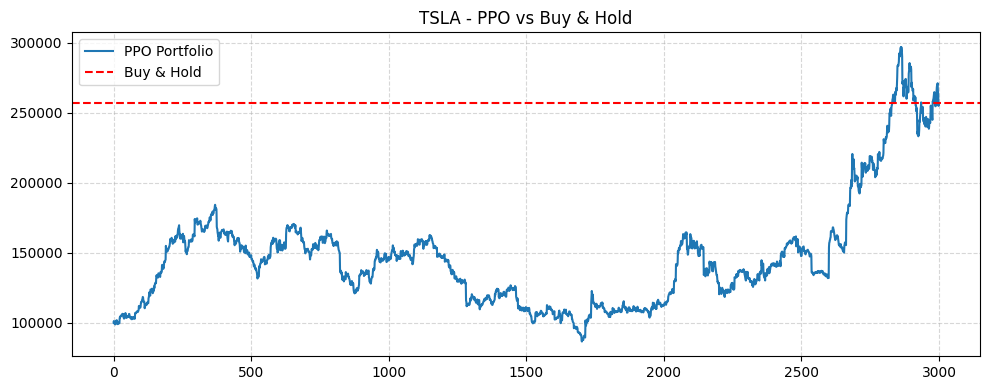


🚀 Processing MSFT


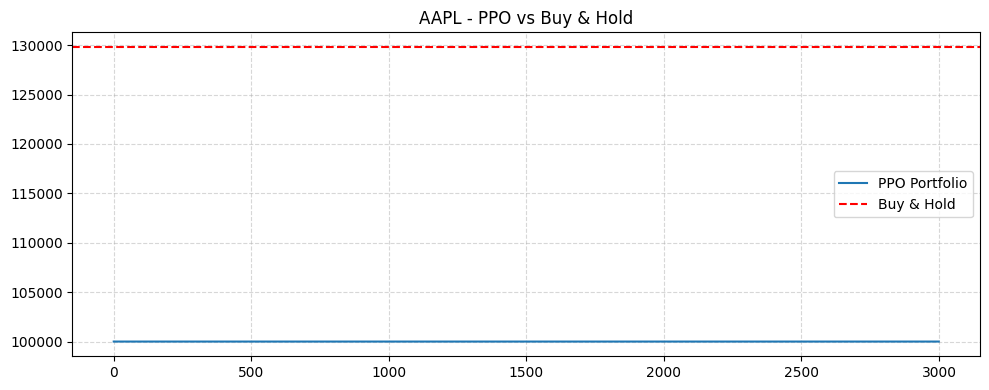


🚀 Processing GOOGL


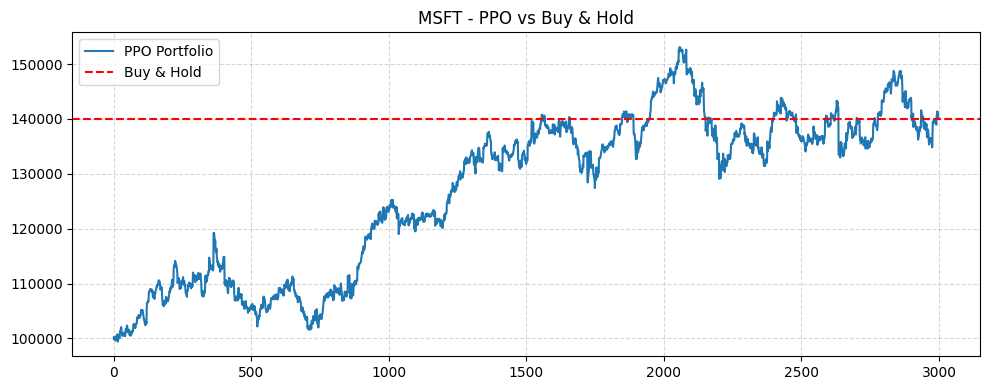


🚀 Processing AMZN


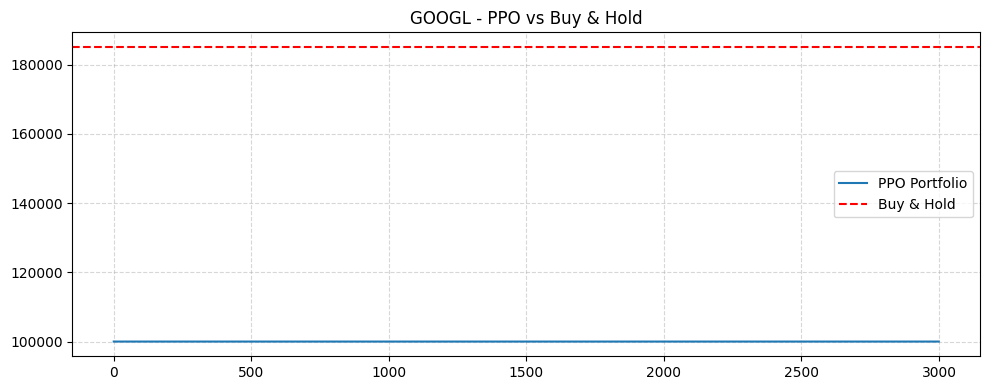


🚀 Processing NVDA


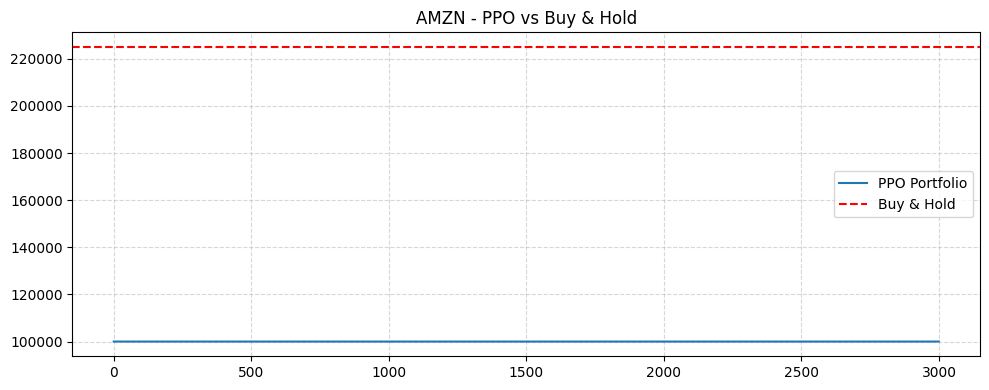


🚀 Processing META


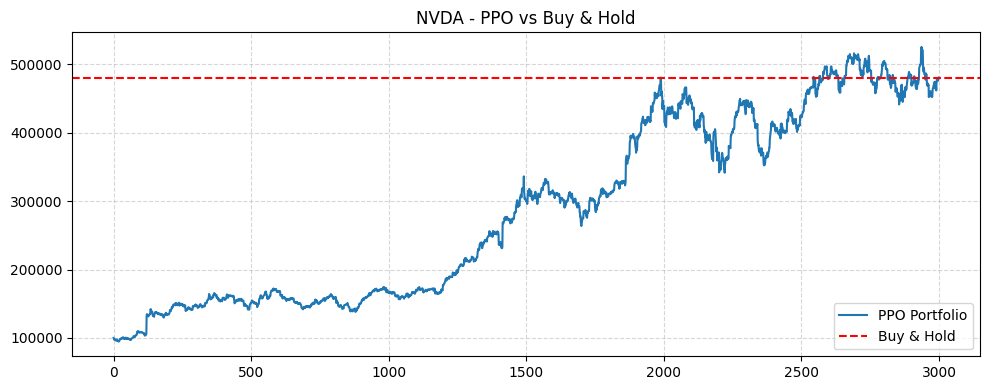


🚀 Processing BRK-B


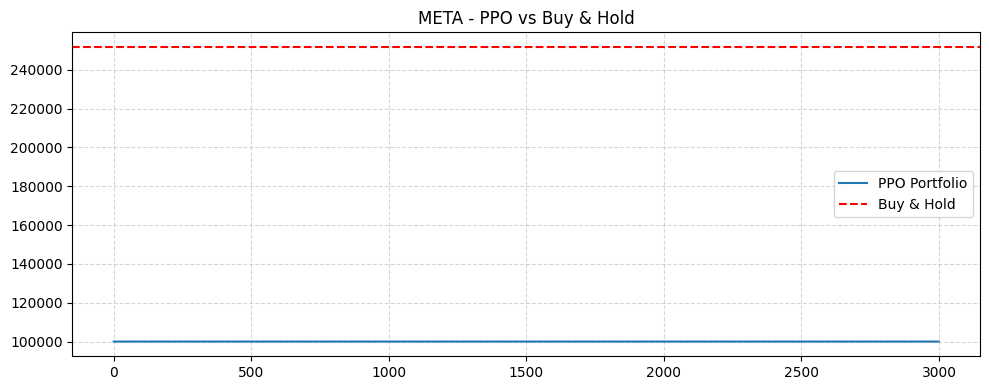


🚀 Processing JPM


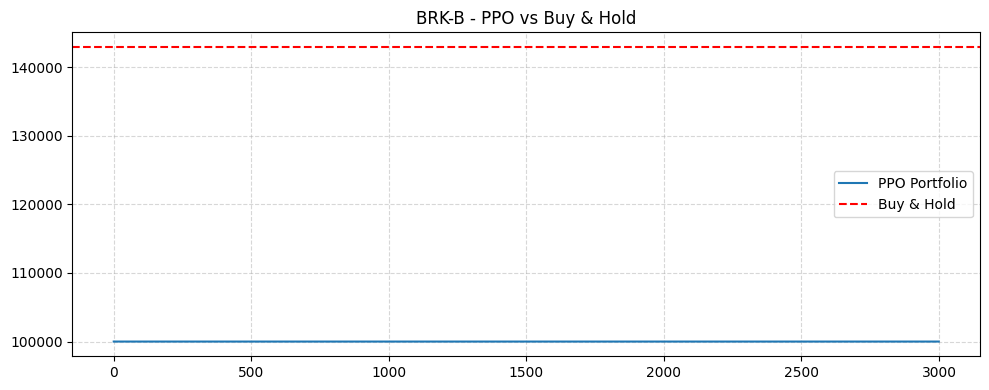


🚀 Processing JNJ


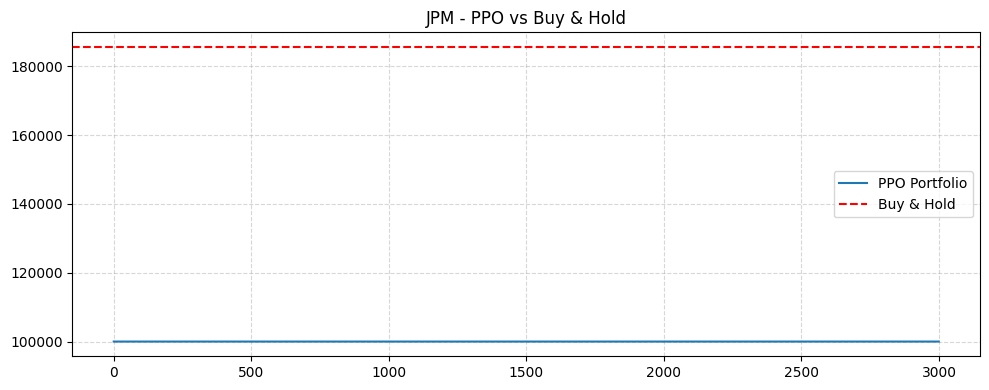


🚀 Processing XOM


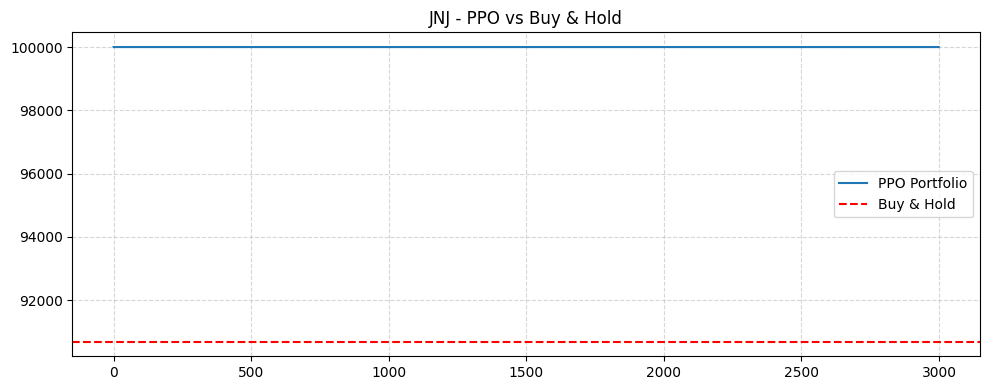


🚀 Processing V


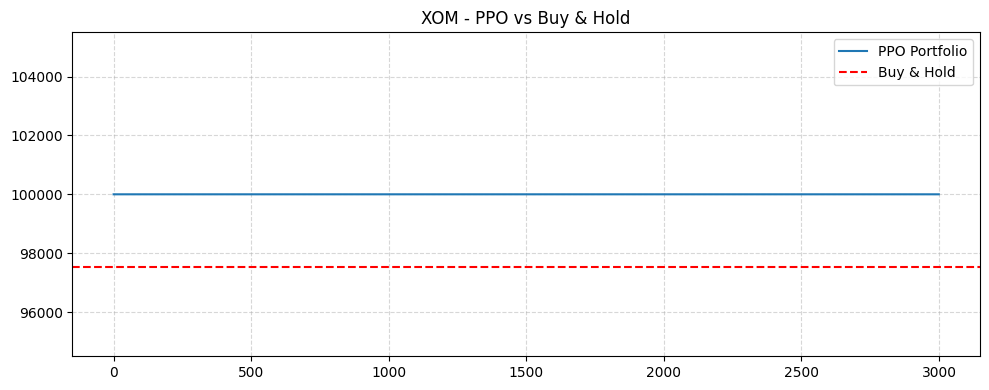


🚀 Processing PG


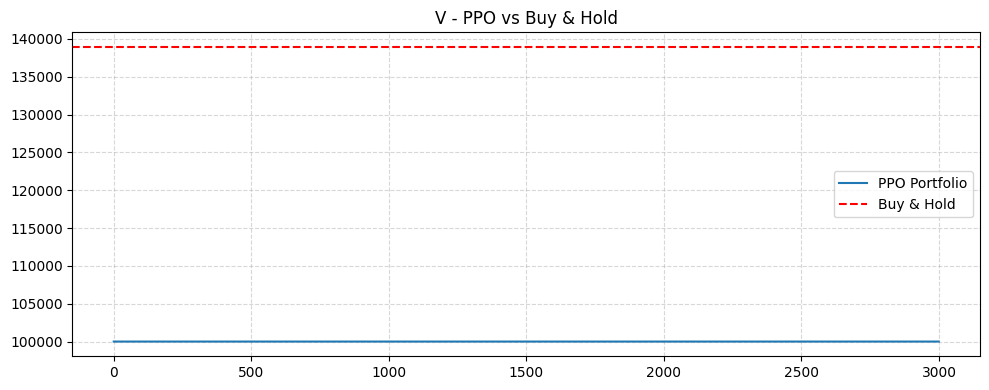


🚀 Processing UNH


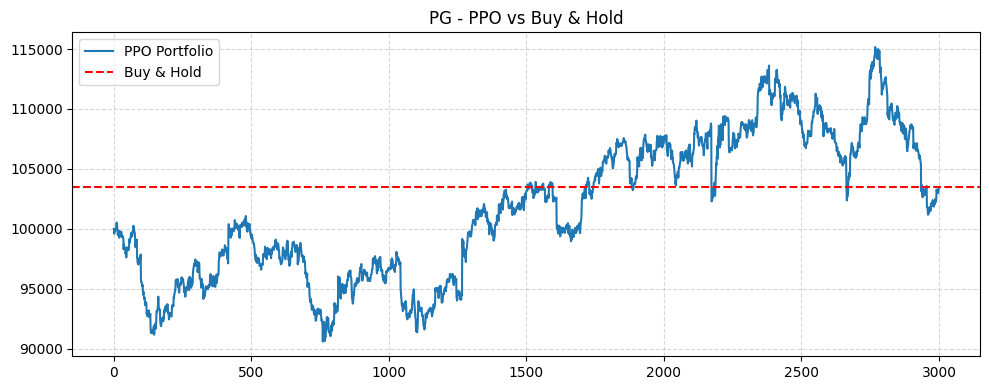


🚀 Processing MA


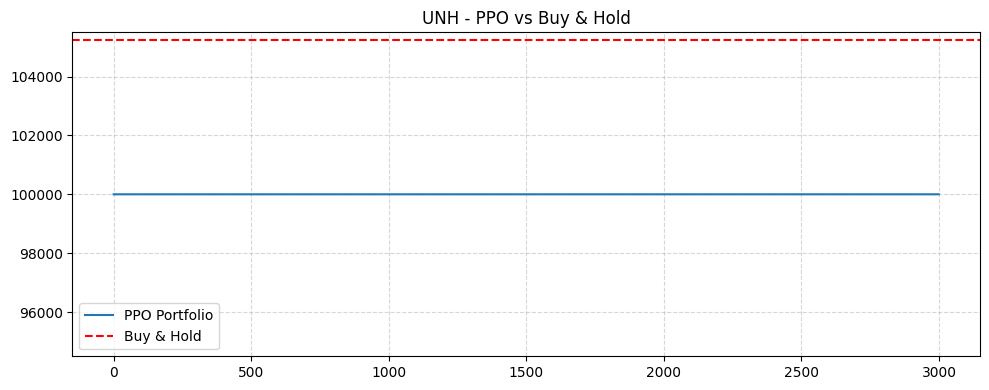


🚀 Processing HD


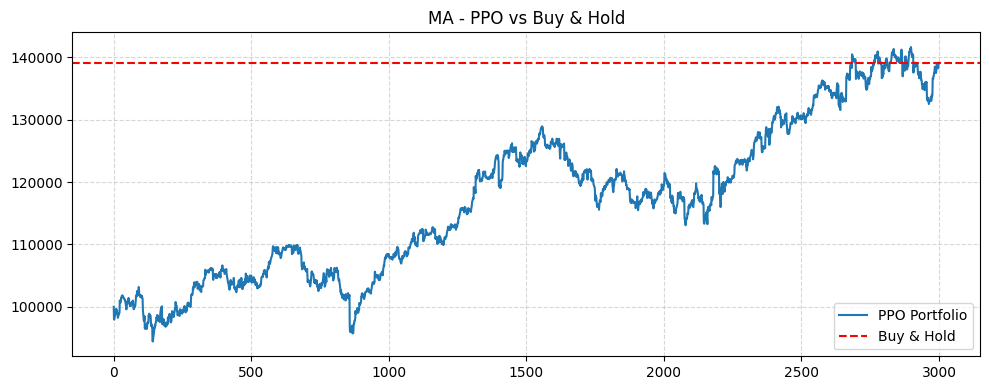


🚀 Processing LLY


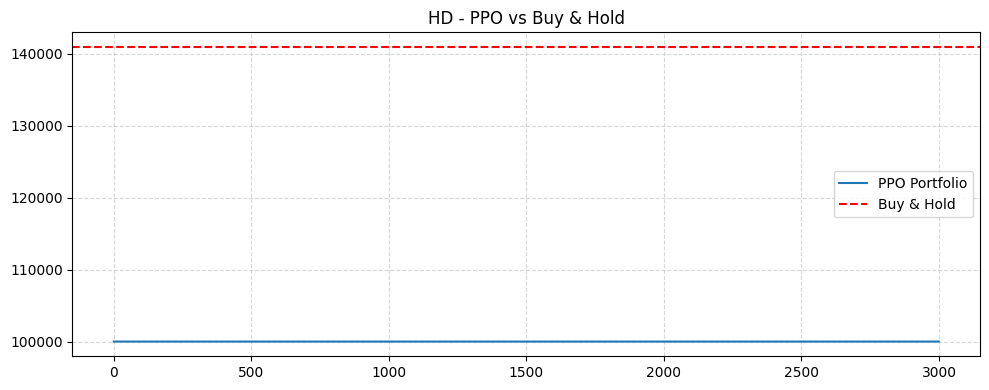


🚀 Processing MRK


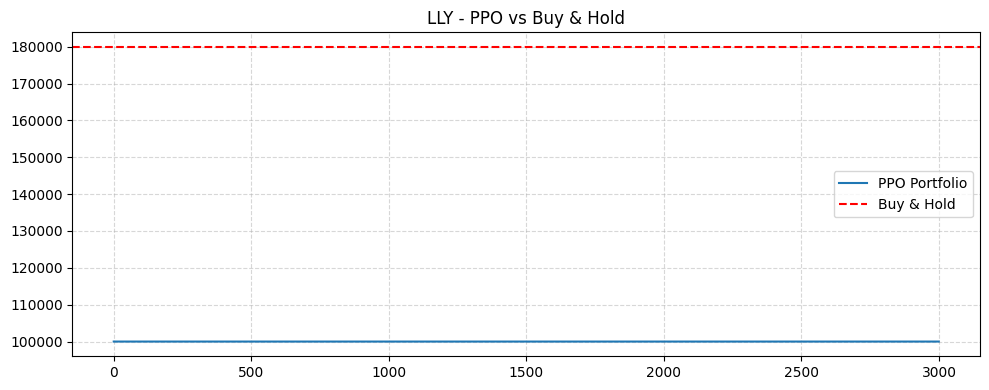


🚀 Processing PEP


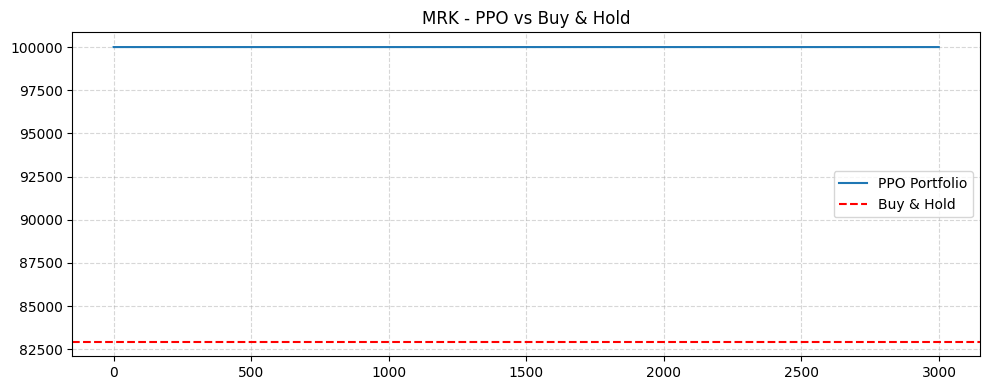


🚀 Processing KO


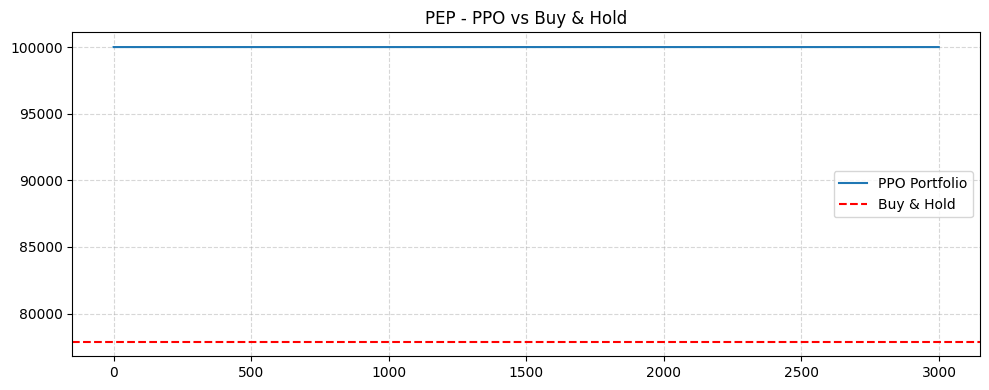


🚀 Processing BAC


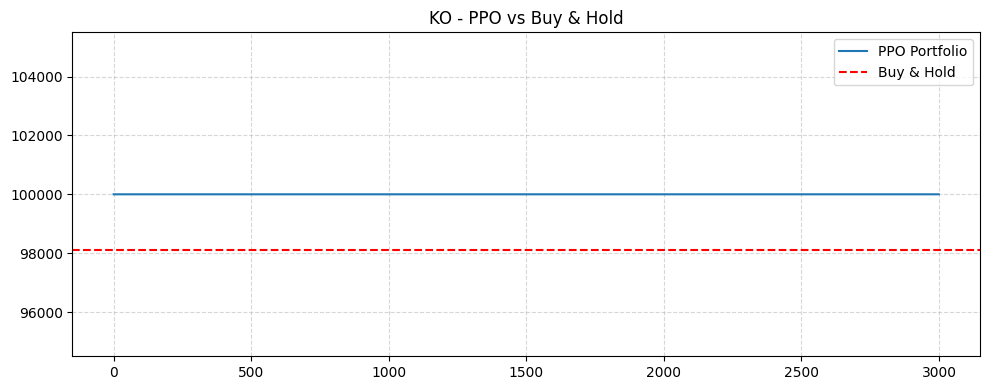


🚀 Processing ABBV


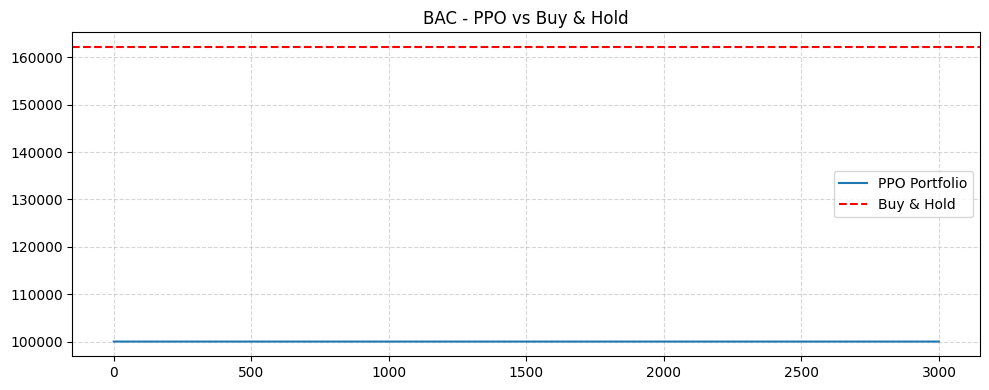


🚀 Processing AVGO


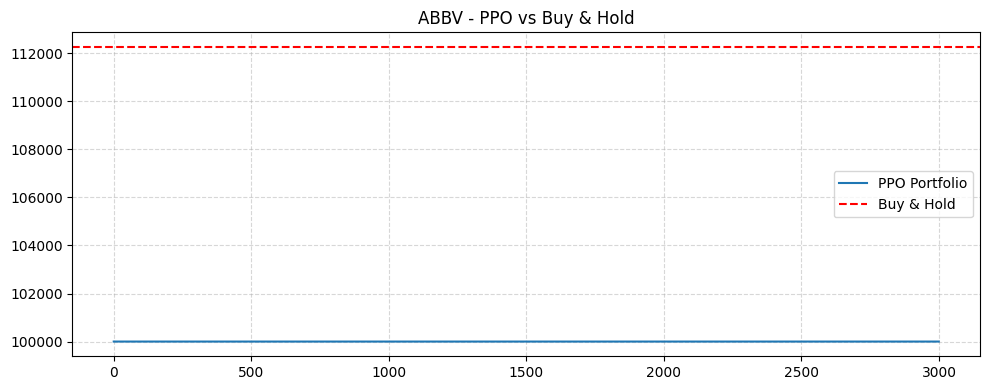


🚀 Processing PFE


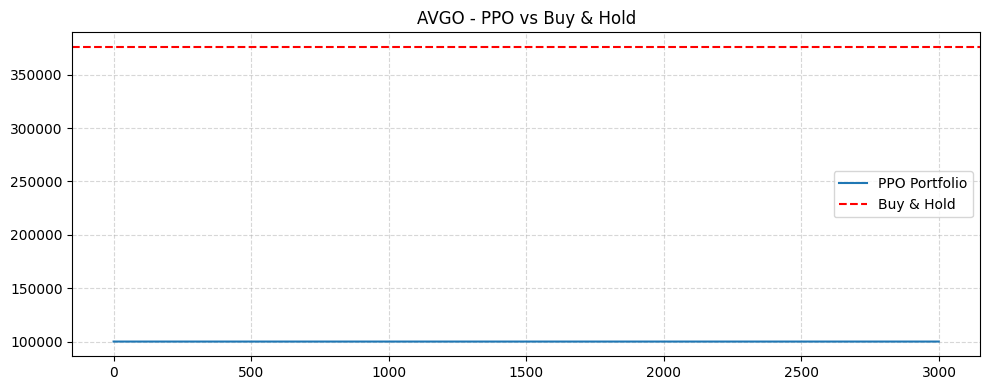


🚀 Processing COST


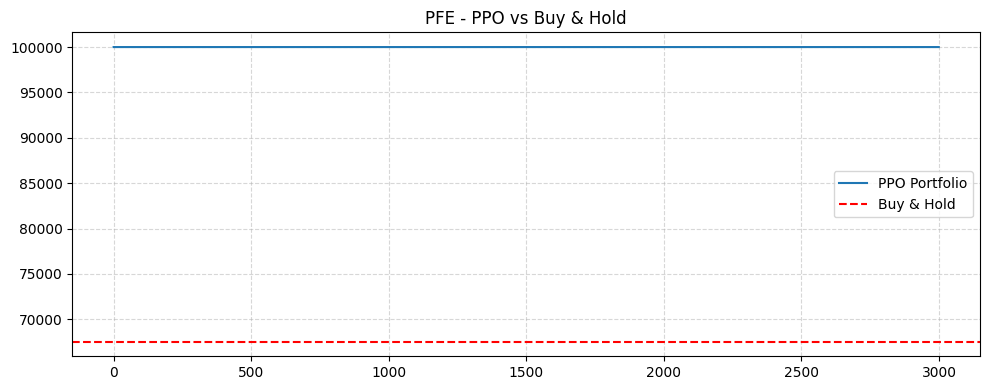


🚀 Processing CSCO


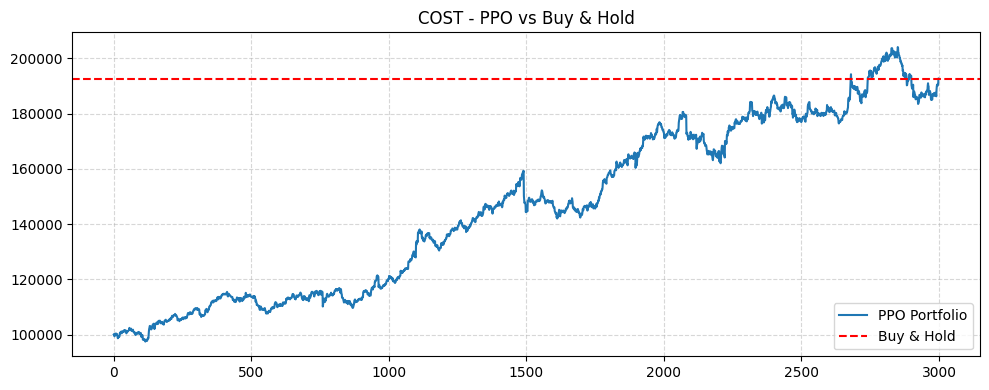


🚀 Processing TMO


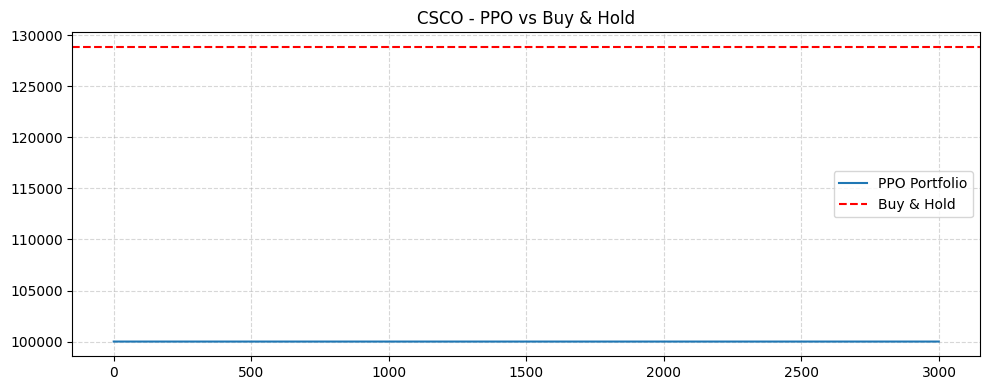


🚀 Processing ABT


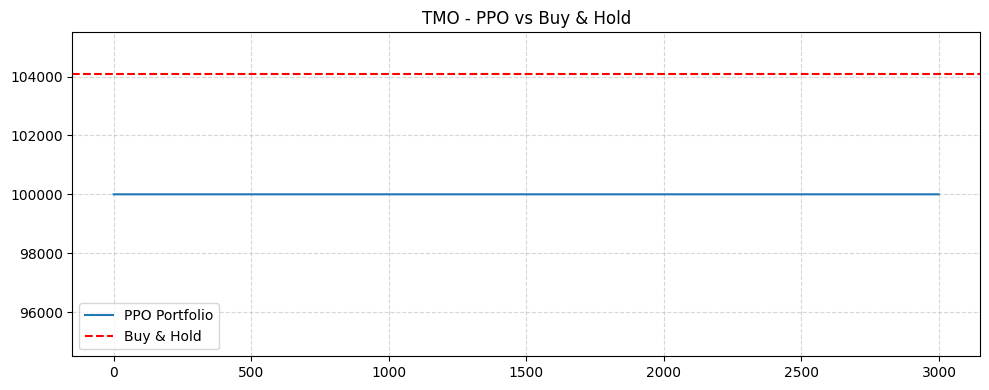


🚀 Processing ACN


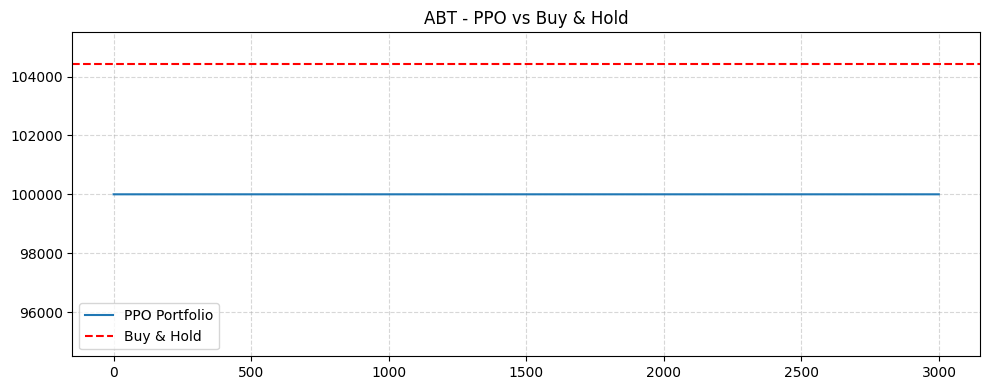


🚀 Processing WMT


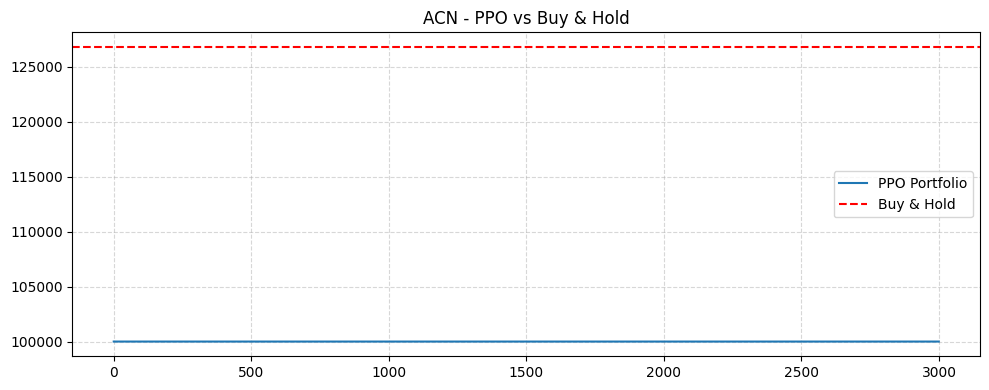


🚀 Processing MCD


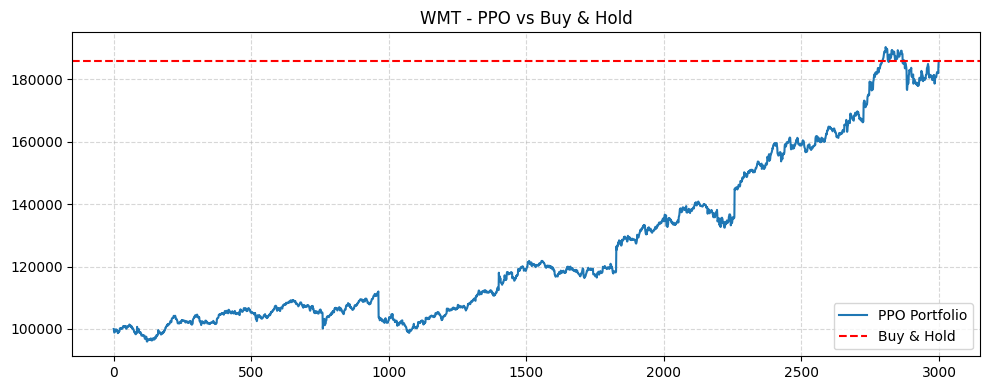


🚀 Processing ADBE


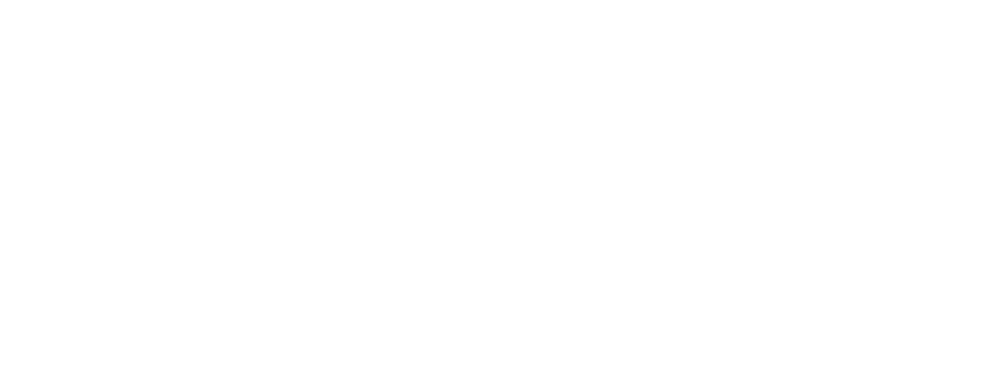

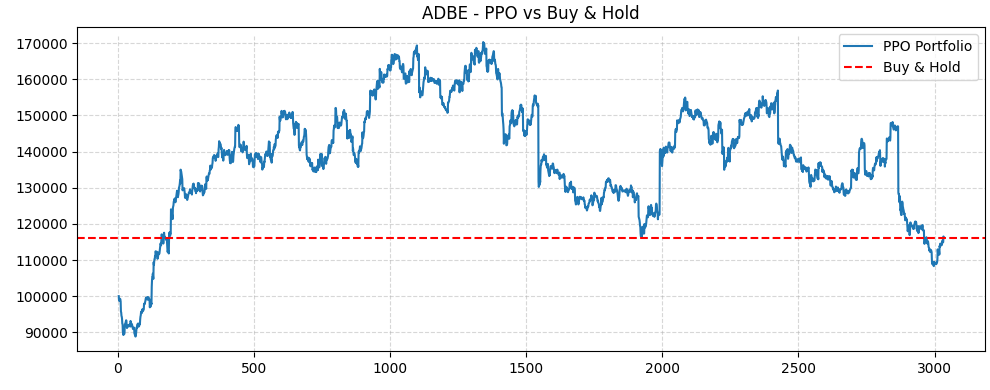

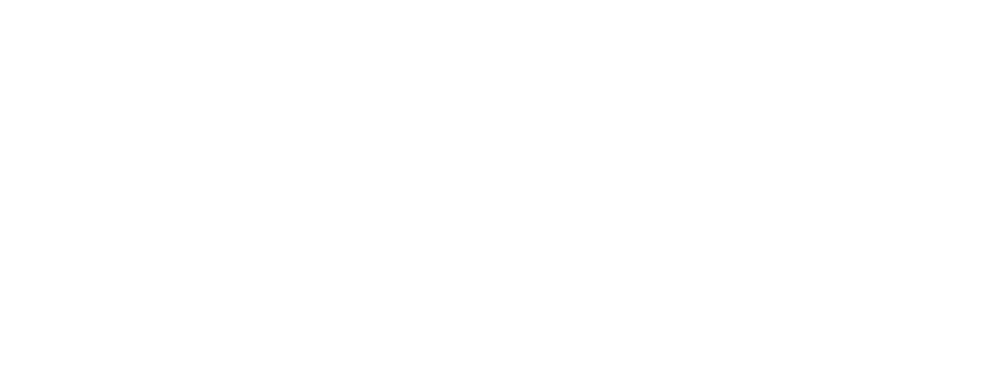


🚀 Processing DHR


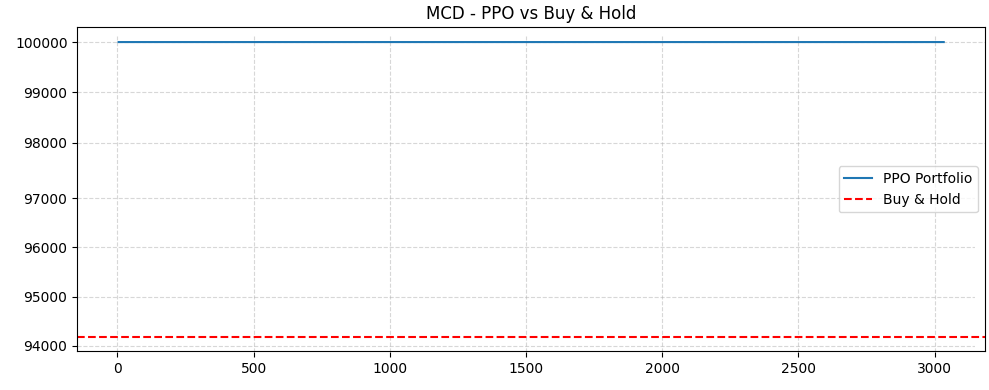


🚀 Processing CRM


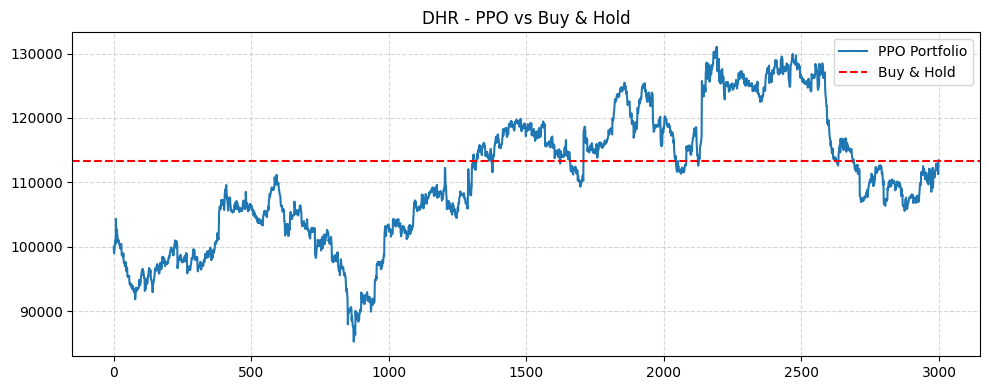


🚀 Processing NKE


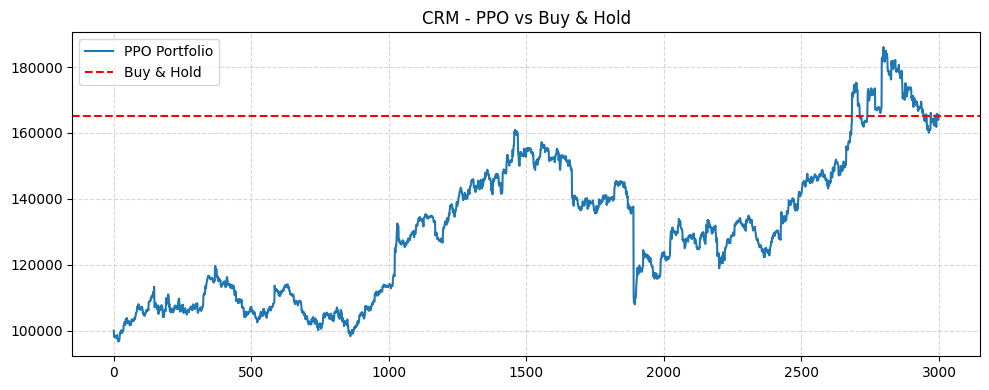


🚀 Processing INTC


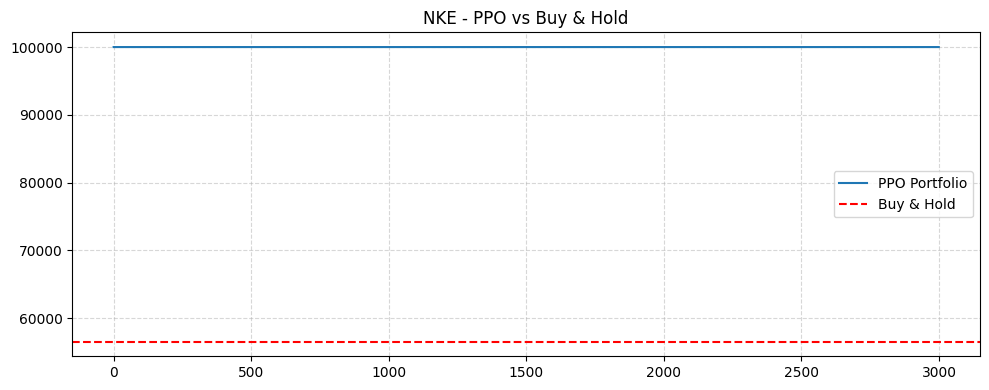


🚀 Processing QCOM


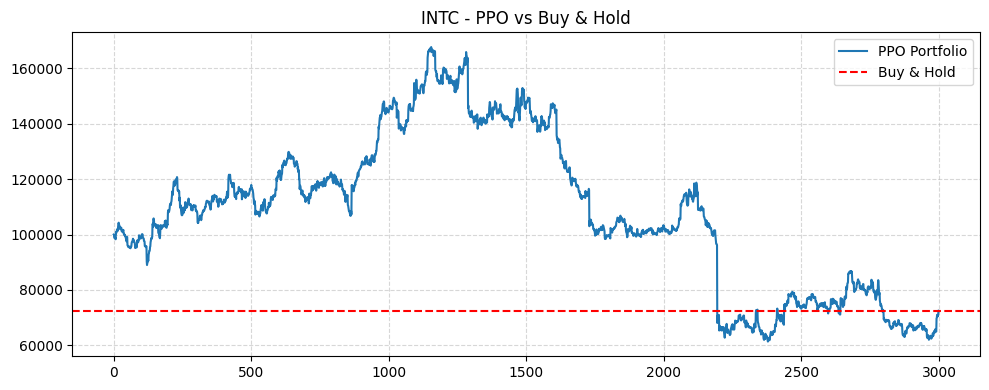


🚀 Processing NEE


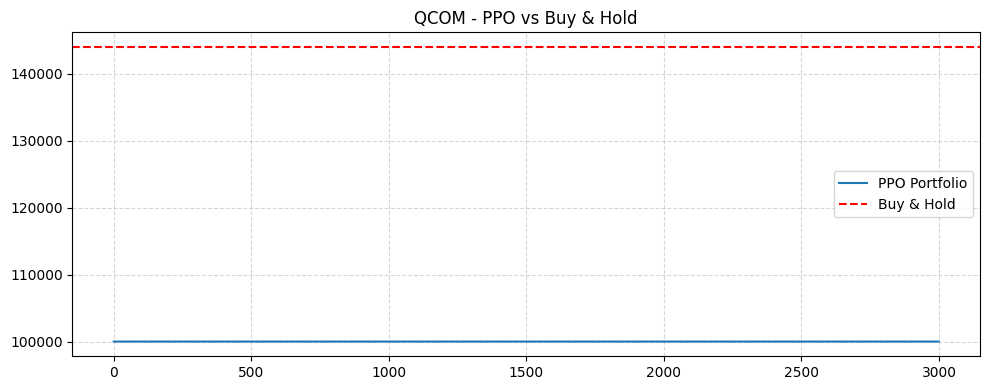


🚀 Processing AMD


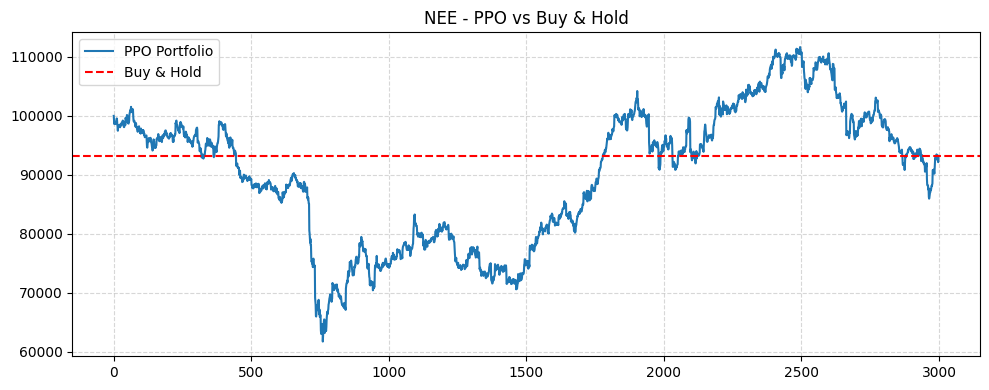


🚀 Processing TXN


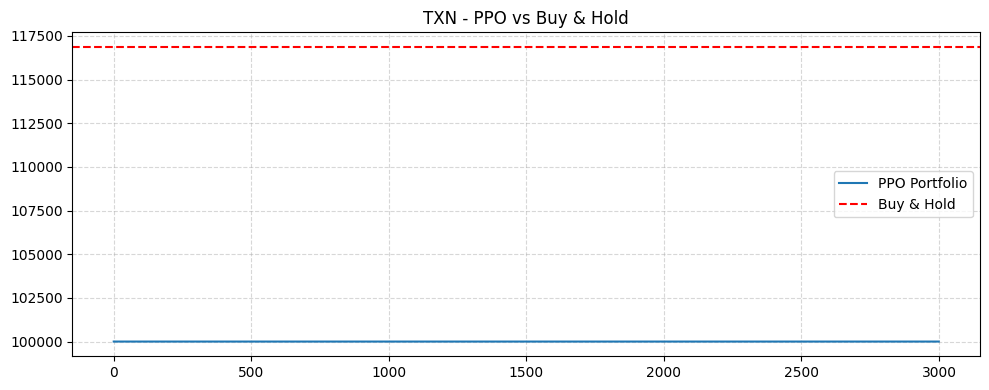


🚀 Processing AMGN


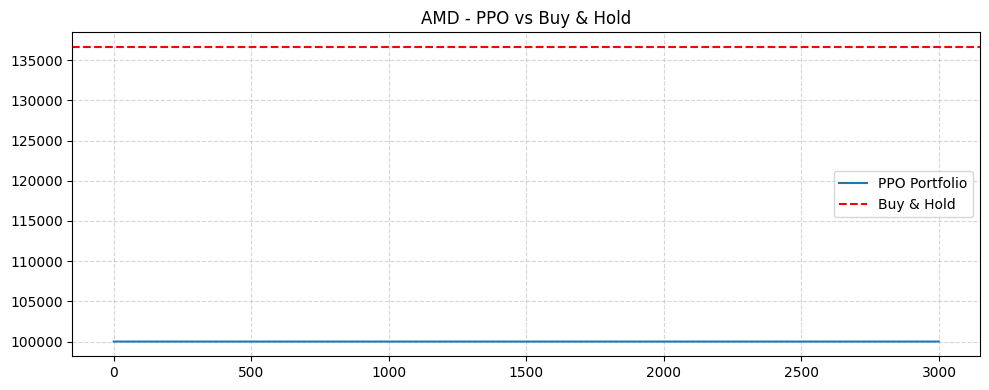


🚀 Processing UPS


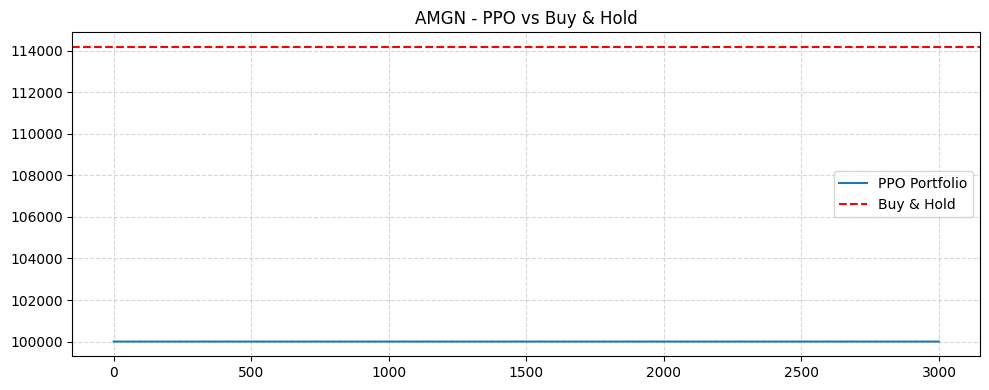


🚀 Processing LIN


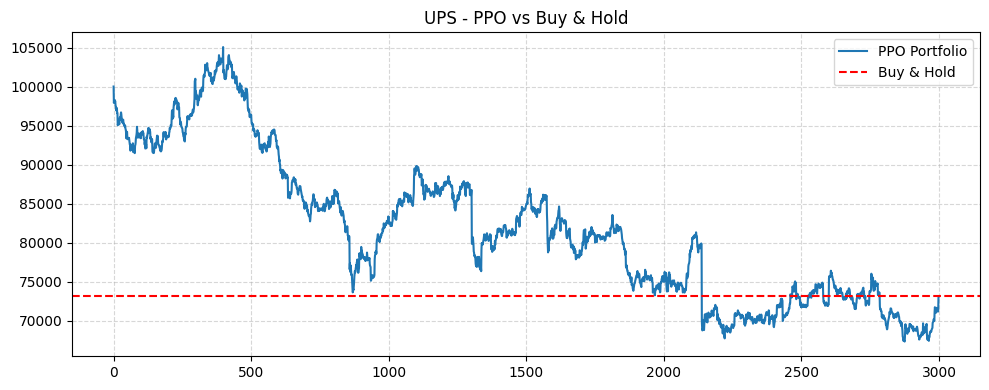


🚀 Processing PM


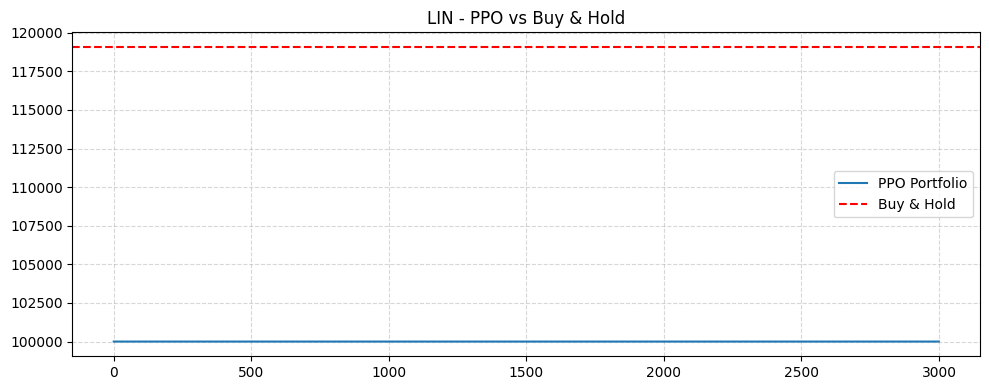


🚀 Processing UNP


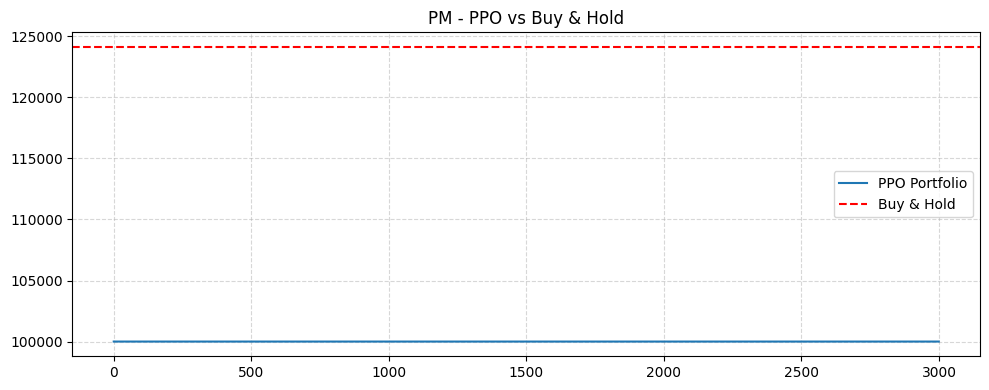


🚀 Processing BMY


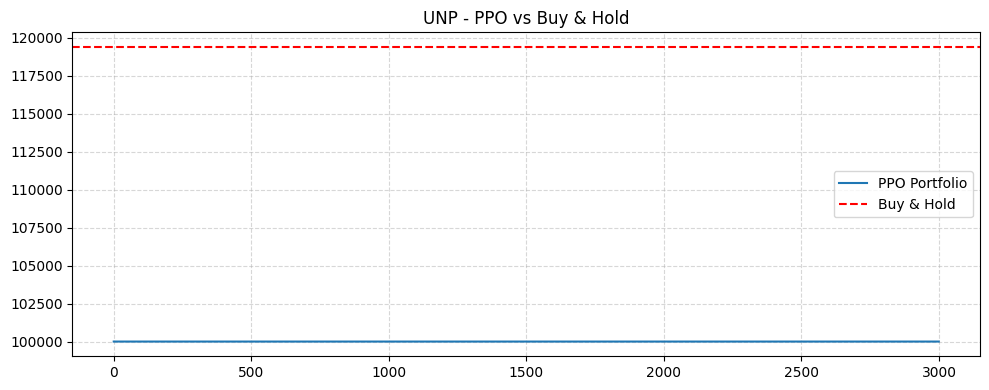


🚀 Processing LOW


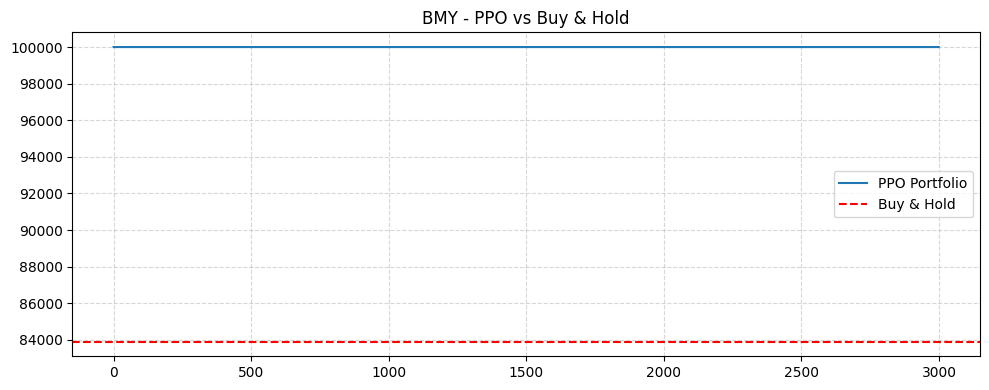


🚀 Processing RTX


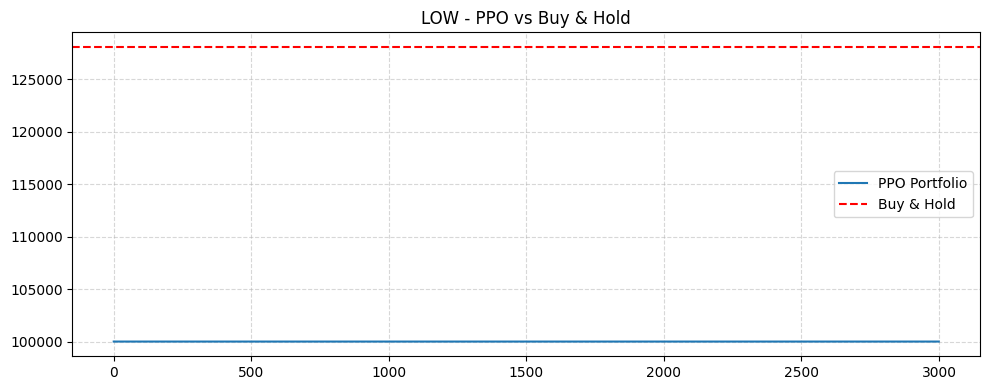


🚀 Processing CVX


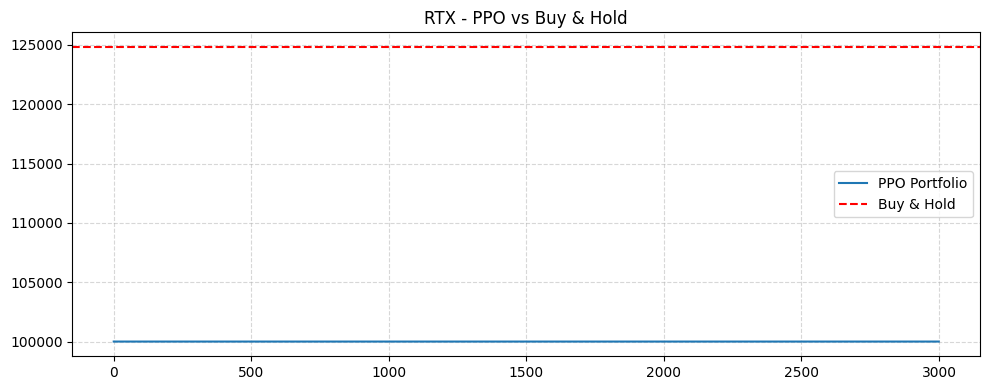


🚀 Processing IBM


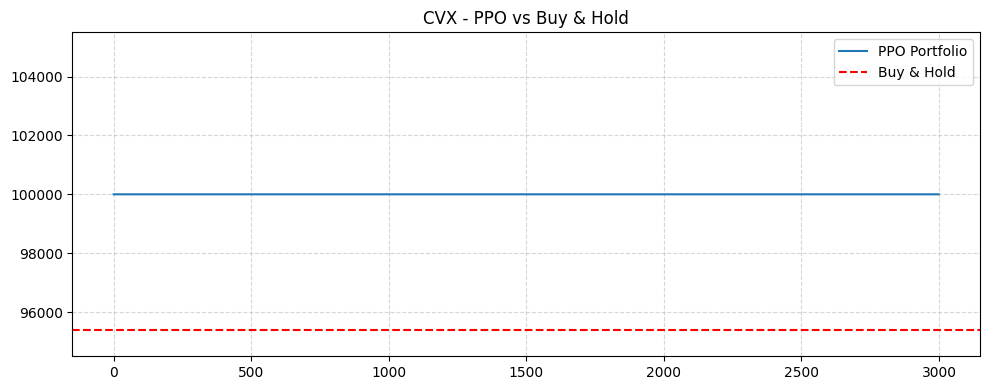


🚀 Processing GE


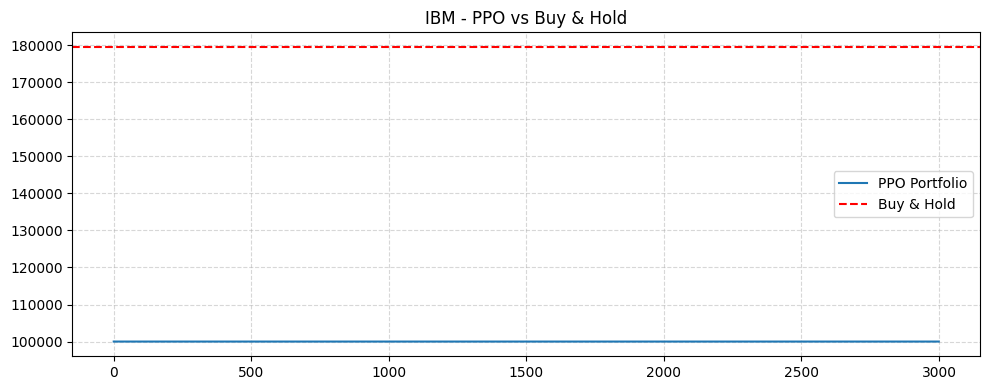


🚀 Processing SBUX


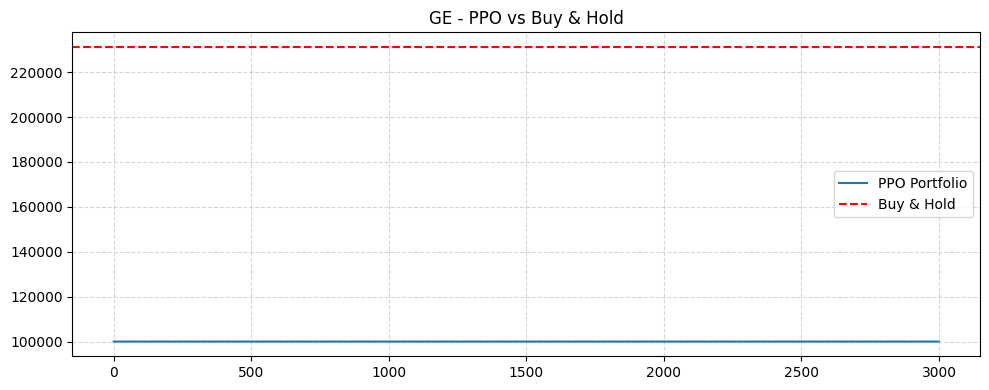


🚀 Processing ORCL


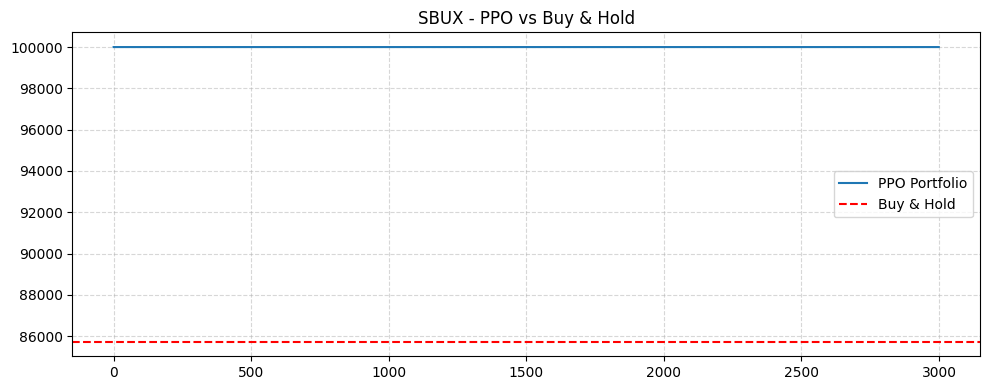

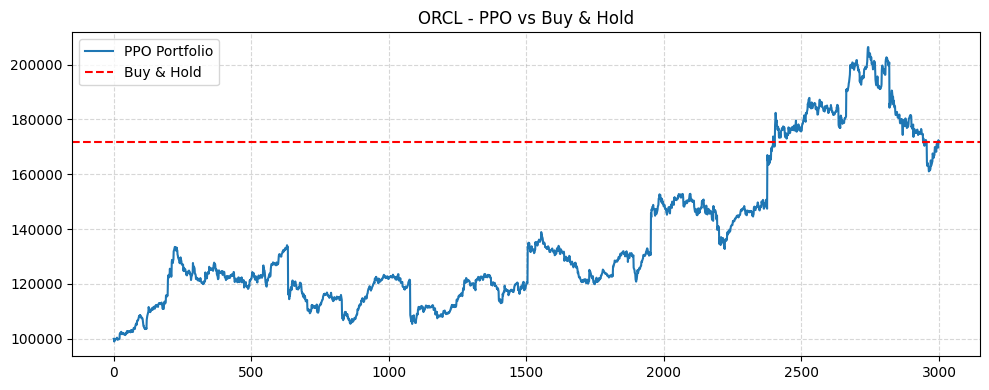


✅ Final summary saved.
   Ticker  Window  PPO_Portfolio    BuyHold  Sharpe  Drawdown_%      Winner
5    NVDA  0-3000      480733.30  480733.30   0.793       28.95  Buy & Hold
1    TSLA  0-3000      256570.65  256570.65   0.481       52.98  Buy & Hold
24   COST  0-3000      192655.37  192655.37   0.825       10.84  Buy & Hold
29    WMT  0-3000      185680.06  185680.06   0.795       11.84  Buy & Hold
52   ORCL  0-3000      171874.33  171874.33   0.430       21.97  Buy & Hold


In [11]:
# ✅ PPO Walkforward with Runtime Timing, Performance Check, and Logging
import os
import gc
import time
import json
import torch
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box

# ✅ Logging Setup
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# ✅ Load Data
if not os.path.exists("multi_stock_feature_engineered_dataset.csv"):
    raise FileNotFoundError("Required feature-engineered dataset not found!")

df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

# ✅ PPO-Compatible Custom Trading Environment
class ContinuousTradingEnv(StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df.reset_index(drop=True), frame_bound=frame_bound, window_size=window_size)
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)

    def step(self, action):
        try:
            if action < -0.3:
                discrete_action = 0
            elif action > 0.1:
                discrete_action = 1
            else:
                discrete_action = 2

            result = super().step(discrete_action)
            if len(result) == 5:
                obs, reward, terminated, truncated, info = result
            else:
                obs, reward, done, info = result
                terminated, truncated = done, False

            price_diff = self.df.loc[self._current_tick, 'Close'] - self.df.loc[self._current_tick - 1, 'Close']
            reward += price_diff * discrete_action
            return obs, np.clip(reward, -1.0, 1.0), terminated, truncated, info
        except Exception as e:
            logging.error(f"Step error: {e}")
            return self.reset(), 0, True, True, {}

# ✅ PPO vs. Buy & Hold Plot
def plot_performance(ticker, portfolio, hold_value):
    plt.figure(figsize=(10, 4))
    plt.plot(portfolio, label="PPO Portfolio")
    plt.axhline(y=hold_value, color="r", linestyle="--", label="Buy & Hold")
    plt.title(f"{ticker} - PPO vs Buy & Hold")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# ✅ Walkforward Window Generator
def get_walk_forward_windows(df, window_size=3000, step_size=500, min_len=1000):
    return [
        (start, start + window_size)
        for start in range(0, len(df) - min_len, step_size)
        if start + window_size < len(df)
    ]

# ✅ PPO Walkforward Function
def walkforward_ppo(df, ticker, window_size=3000, step_size=500, timesteps=20000):
    if len(df) < window_size:
        logging.warning(f"Skipping {ticker}: only {len(df)} rows (min required: {window_size})")
        return []

    results = []
    windows = get_walk_forward_windows(df, window_size, step_size)
    device = "cuda" if torch.cuda.is_available() else "cpu"

    for w_idx, (start, end) in enumerate(windows):
        window_start_time = time.time()
        gc.collect()
        df_window = df.iloc[start:end].reset_index(drop=True)
        if len(df_window) <= 52 or len(df_window) % 2 != 0:
            df_window = df_window.iloc[:-1]

        logging.info(f"{ticker} | Window {w_idx+1}/{len(windows)} | Rows: {len(df_window)}")
        frame_bound = (50, len(df_window) - 3)

        env = DummyVecEnv([lambda: ContinuousTradingEnv(df=df_window, frame_bound=frame_bound, window_size=10)])
        model = PPO("MlpPolicy", env, verbose=0, device=device, policy_kwargs=dict(net_arch=[64, 64]))
        model.learn(total_timesteps=timesteps)

        obs = env.reset()
        position, balance, portfolio, trade_log = 0, 100000, [], []

        for i in range(len(df_window)):
            action, _ = model.predict(obs, deterministic=True)
            step_result = env.step(action)
            if len(step_result) == 5:
                obs, reward, terminated, truncated, info = step_result
            else:
                obs, reward, done, info = step_result
                terminated, truncated = done, False

            action_val = float(action.flatten()[0])
            price = df_window['Close'].iloc[i]

            if action_val > 0.3 and position == 0:
                position = balance / price
                balance = 0
                trade_log.append("BUY")
            elif action_val < -0.3 and position > 0:
                balance = position * price
                position = 0
                trade_log.append("SELL")
            else:
                trade_log.append("HOLD")

            portfolio.append(balance if balance > 0 else position * price)

        if not portfolio:
            continue

        final_value = portfolio[-1]
        hold_value = (100000 / df_window['Close'].iloc[0]) * df_window['Close'].iloc[-1]
        returns = pd.Series(portfolio).pct_change().fillna(0)
        sharpe = (returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252)
        drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100

        results.append({
            "Ticker": ticker,
            "Window": f"{start}-{end}",
            "PPO_Portfolio": round(final_value, 2),
            "BuyHold": round(hold_value, 2),
            "Sharpe": round(sharpe, 3),
            "Drawdown_%": round(drawdown, 2),
            "Winner": "PPO" if final_value > hold_value else "Buy & Hold"
        })

        plot_performance(ticker, portfolio, hold_value)
        logging.info(f"⏱️ {ticker} | Window {w_idx+1} runtime: {round(time.time() - window_start_time, 2)} sec")

        del env, model, df_window, portfolio, trade_log
        gc.collect()
        torch.cuda.empty_cache()

    return results

# ✅ Ticker Processor
def process_ticker(ticker):
    print(f"\n🚀 Processing {ticker}")
    df_ticker = df[df['Symbol'] == ticker].copy()
    if df_ticker.empty:
        print(f"⚠️ No data found for {ticker}")
        return []
    return walkforward_ppo(df_ticker, ticker)

# ✅ Parallel Runner with Resume + Safe Read
def run_parallel_tickers(tickers, out_path="results/ppo_walkforward/summary.csv"):
    os.makedirs("results/ppo_walkforward", exist_ok=True)

    completed = set()
    if os.path.exists(out_path) and os.path.getsize(out_path) > 0:
        try:
            completed_df = pd.read_csv(out_path)
            completed = set(completed_df['Ticker'].unique())
        except Exception as e:
            print(f"⚠️ Warning reading {out_path}: {e}")
            completed = set()

    tickers_to_run = [t for t in tickers if t not in completed]
    print(f"Tickers to run: {tickers_to_run}")

    results = []
    with ThreadPoolExecutor(max_workers=min(len(tickers_to_run), os.cpu_count())) as executor:
        for result in executor.map(process_ticker, tickers_to_run):
            if result:
                results.extend(result)
                pd.DataFrame(results).to_csv(out_path, index=False)

    print("\n✅ Final summary saved.")
    return results

# ✅ Final Print Block
CONFIG = {
    'symbols': df['Symbol'].unique().tolist()
}

test_mode = False
summary = []

if test_mode:
    print("\n🧪 Test mode enabled: Running AAPL only")
    summary = walkforward_ppo(df[df['Symbol'] == 'AAPL'].copy(), 'AAPL')
    pd.DataFrame(summary).to_csv("results/ppo_walkforward/summary.csv", index=False)
else:
    summary_df = run_parallel_tickers(CONFIG['symbols'])
    if summary_df:
        df_summary = pd.DataFrame(summary_df)
        if not df_summary.empty and "PPO_Portfolio" in df_summary.columns:
            print(df_summary.sort_values("PPO_Portfolio", ascending=False).head())
        else:
            print("⚠️ No valid PPO portfolio results in the summary.")
    else:
        print("⚠️ No PPO walkforward results were generated. Check data availability.")


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

summary_df = pd.read_csv("results/ppo_walkforward/summary.csv")

avg_df = summary_df.groupby("Ticker")[["PPO_Portfolio", "BuyHold", "Sharpe", "Drawdown_%"]].mean()
top5 = avg_df.sort_values("Sharpe", ascending=False).head(5)
bottom5 = avg_df.sort_values("Sharpe", ascending=True).head(5)

# ✅ Summary Statistics
if not summary_df.empty:
    winner_counts = summary_df["Winner"].value_counts()
    avg_metrics = summary_df.groupby("Ticker")[["PPO_Portfolio", "BuyHold", "Sharpe", "Drawdown_%"]].mean()
    ppo_wins = (summary_df["Winner"] == "PPO").sum()
    total_cases = len(summary_df)
    ppo_win_rate = round(ppo_wins / total_cases * 100, 2)

    print("\n📊 Walkforward PPO Summary:")
    print(f"✅ PPO outperformed Buy & Hold in {ppo_wins}/{total_cases} windows ({ppo_win_rate}%)")
    print("\n🏆 Winner Count:")
    print(winner_counts)
    print("\n📈 Average Metrics per Ticker (Top 10 by Sharpe):")
    print(avg_metrics.sort_values("Sharpe", ascending=False).head(10))
else:
    print("⚠️ PPO summary file is empty or missing required data.")



📊 Walkforward PPO Summary:
✅ PPO outperformed Buy & Hold in 11/53 windows (20.75%)

🏆 Winner Count:
Winner
Buy & Hold    42
PPO           11
Name: count, dtype: int64

📈 Average Metrics per Ticker (Top 10 by Sharpe):
        PPO_Portfolio    BuyHold  Sharpe  Drawdown_%
Ticker                                              
COST        192655.37  192655.37   0.825       10.84
WMT         185680.06  185680.06   0.795       11.84
NVDA        480733.30  480733.30   0.793       28.95
TSLA        256570.65  256570.65   0.481       52.98
MA          139104.14  139104.14   0.465       12.92
ORCL        171874.33  171874.33   0.430       21.97
CRM         165259.16  165259.16   0.415       32.92
MSFT        140083.13  140083.13   0.385       15.69
ADBE        116124.55  116124.55   0.162       36.41
DHR         113318.05  113318.05   0.161       23.29


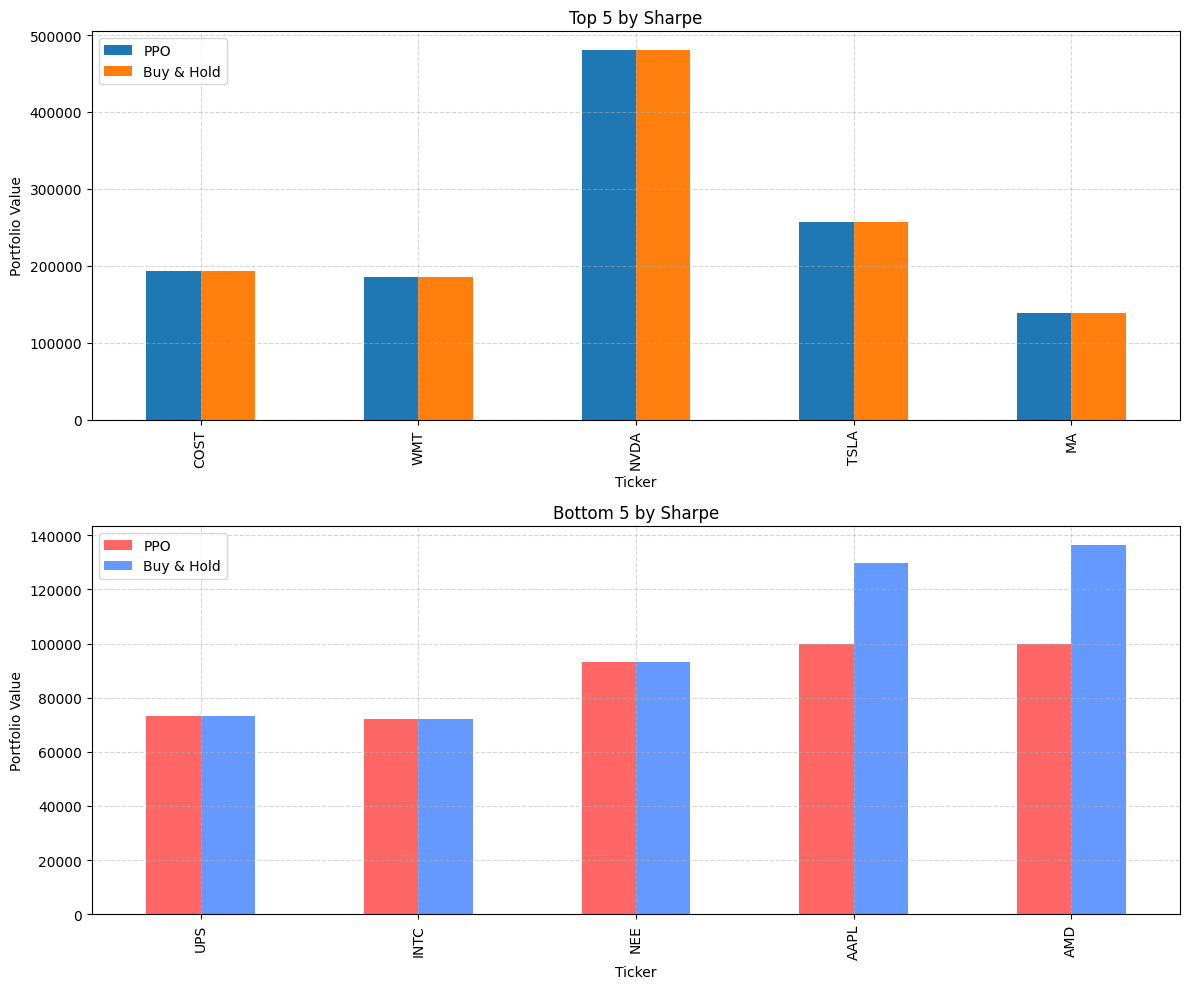

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PPO Walkforward Summary
summary_df = pd.read_csv("results/ppo_walkforward/summary.csv")

if not summary_df.empty and "Sharpe" in summary_df.columns:
    avg_df = summary_df.groupby("Ticker")[["PPO_Portfolio", "BuyHold", "Sharpe", "Drawdown_%"]].mean()
    top5 = avg_df.sort_values("Sharpe", ascending=False).head(5)
    bottom5 = avg_df.sort_values("Sharpe", ascending=True).head(5)

    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # Top 5 by Sharpe
    top5[["PPO_Portfolio", "BuyHold"]].plot(kind='bar', ax=axes[0], title='Top 5 by Sharpe')
    axes[0].set_ylabel('Portfolio Value')
    axes[0].legend(["PPO", "Buy & Hold"], loc="upper left")
    axes[0].grid(True, linestyle='--', alpha=0.5)

    # Bottom 5 by Sharpe
    bottom5[["PPO_Portfolio", "BuyHold"]].plot(kind='bar', ax=axes[1], title='Bottom 5 by Sharpe', color=["#ff6666", "#6699ff"])
    axes[1].set_ylabel('Portfolio Value')
    axes[1].legend(["PPO", "Buy & Hold"], loc="upper left")
    axes[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
else:
    print("Summary file is empty or missing required columns.")
